# Lab 2. Performing experiments with exlectron in electrical and magnetic fields
Moodle ..

Evgeny Kolonsky, Feb 2023

## Setup
1. Oscillograf analogue Keysight, modified:
2. Wires :
  - banana plus 1m x3
  - banana minus 1m x3
  - coaxial-banana **gold**, x1
3. Measurement equipment:
  - DMM x2
  - short pieces of liners
4. Powers source Gamatronic x1



Coaxial-banana gold wire:
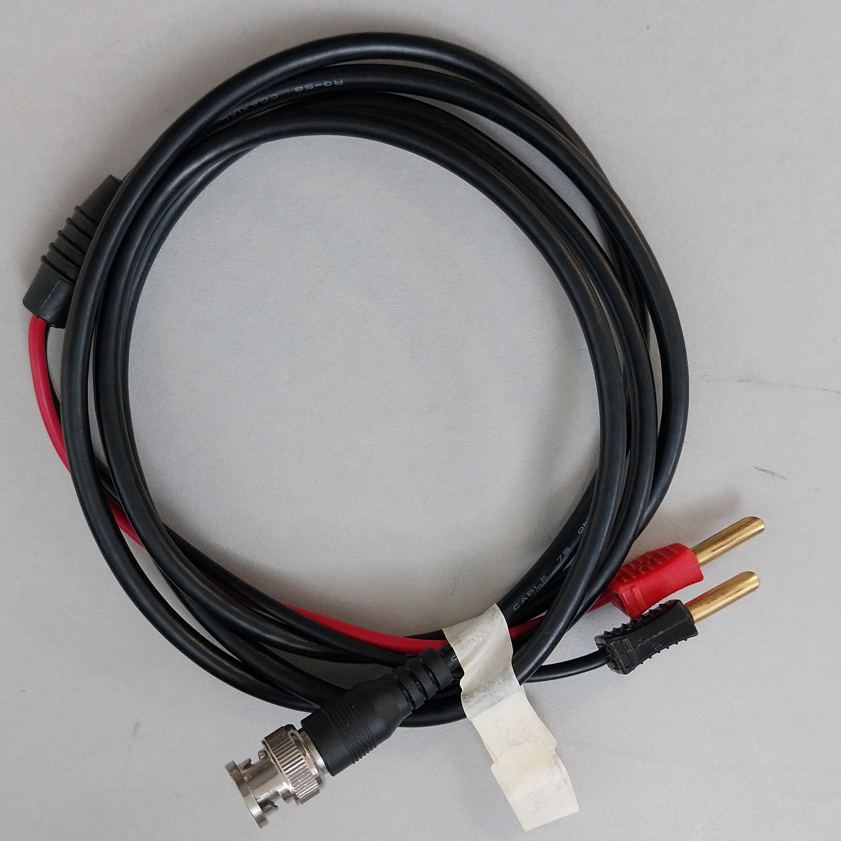

## Electron in electric field

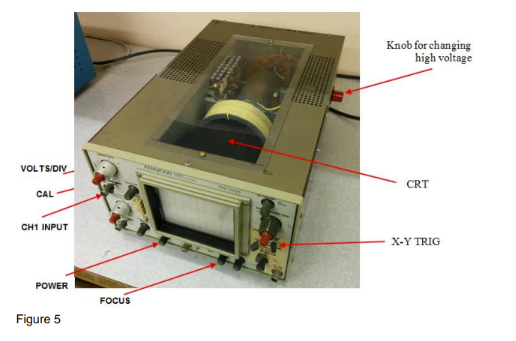

Text(0.5, 1.0, 'Electron in electric field experiment')

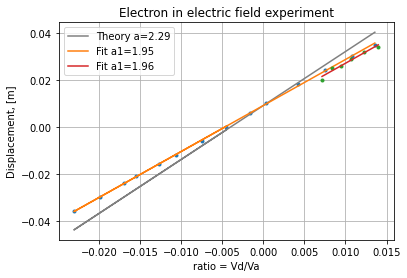

In [ ]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


#%% theory
#%%
L = 252e-3
l = 36.4e-3
d = 2.0e-3
a = l*L/d/2

#%% Va - fix, Vd - change
measurements = '''
0 -05.04
-3 -08.36
-6 -11.87
-8 -14.16
-10.5 -17.29
-12 -18.87
-15 -22.13
-18 -25.66
3 -01.80
5 00.33
9 04.70
12 08.31
15 11.96
17.5 15.10
'''

Va = .1112 *1e4

data = np.genfromtxt(measurements.splitlines(), dtype=float)
D, Vd = data.T
ratio = Vd/Va

D = D*2e-3

fit = linregress(ratio, D)
a1 = fit.slope

plt.plot(ratio, D,'.')

plt.plot(ratio, a*ratio + fit.intercept, color='gray', label='Theory a={:.2f}'.format(a))

plt.plot(ratio, a1*ratio + fit.intercept, label='Fit a1={:.2f}'.format(a1))



#
# Va - change, Vd - fix

Vd = 15.58

measurements = '''
.1113 17
.1265 16
.1456 14.5
.1646 13
.1867 12.5
.2180 10
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Va, D = data.T
D = D*2e-3

Va = Va*1e4

ratio = Vd/Va

fit = linregress(ratio, D)
a2 = fit.slope


plt.plot(ratio, D,'.')
plt.plot(ratio, a2*ratio + fit.intercept, label='Fit a1={:.2f}'.format(a2))


plt.xlabel('ratio = Vd/Va')
plt.ylabel('Displacement, [m]')
plt.grid()
plt.legend()
plt.title('Electron in electric field experiment')



## Electron in magnetic field

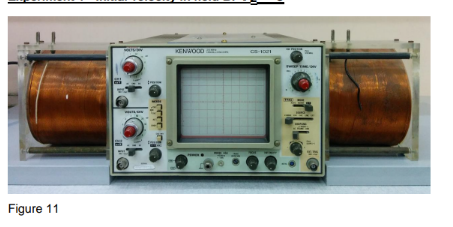

"\ndata = np.genfromtxt(measurements.splitlines(), dtype=float)\nD, Va, I = data.T\n\nD = D*2e-3\nVa = Va*1e4\n\nratio = I/np.sqrt(Va)\n\nfit = linregress(ratio, D)\na2 = fit.slope\n\nplt.plot(ratio, D,'.')\nplt.plot(ratio, a2*ratio + fit.intercept, label='Fix current a={:.2f}'.format(a2))\n\n\nplt.xlabel(r'Ratio $I/\\sqrt{V_a}$')\nplt.ylabel('Displacement, [m]')\nplt.grid()\nplt.legend()\nplt.title('Electron in magnetic field experiment')\n"

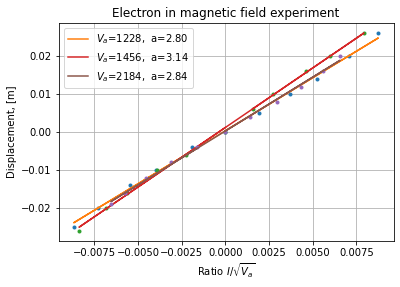

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 12 15:31:22 2023

@author: student
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


#%% Constants and parameters
mu0 = 4*np.pi *1e-7 # weber/amp-m
e = 1.6021e-19      # C
m = 9.1091e-31      #kg

# geometry of the coil for experiment 1
h = 0.049 #m
R = 0.049 #m
R1 = 0.067 #m
b = (R + R1) # see fig. 7b
n = 3250   #1/m

def F(x):
    l1 = R1 + np.sqrt(R1**2 +x**2)
    l2 = R + np.sqrt(R**2 +x**2)
    return x*np.log(l1/l2)
def B(z, I):
    return mu0 *n *I (F(h-z) + F(h+z))/2/(R1-R)

BB0 = 0.6 # approximately for displacenets 0 - 2 cm, fig.15
K1 = -np.sqrt(e/m) * n * mu0 * BB0 * b**2 /(2*np.sqrt(2))

#%% Measurements
# Experiment 1.1 Fix Va, change current on the coils

Va = .1228 * 1e4

measurements='''
0     0
.3067 13
.2485 10
.1834 7
.1293 5
.0676 2.5
-.3036 -12.5
-.2554  -10
-.1907 -7
-.1394 -5
-.0671  -2
'''

data = np.genfromtxt(measurements.splitlines(), dtype=float)
I, D = data.T

D = D*2e-3

ratio = I/np.sqrt(Va)

fit = linregress(ratio, D)
a2 = fit.slope

plt.plot(ratio, D,'.')
plt.plot(ratio, a2*ratio + fit.intercept, label='$V_a$={:.0f},  a={:.2f}'.format(Va, a2))


# Experiment 1.2 Fix other Va
Va = .1456 * 1e4

measurements='''
.06 3
.1032 5
.1753 8
.2296 10
.3028 13
-.3194 -13
-.2609 -10
-.2154 -8
-.1484 -5
-.0861 -3
0 0
'''

data = np.genfromtxt(measurements.splitlines(), dtype=float)
I, D = data.T

D = D*2e-3

ratio = I/np.sqrt(Va)

fit = linregress(ratio, D)
a1 = fit.slope

plt.plot(ratio, D,'.')
plt.plot(ratio, a1*ratio + fit.intercept, label='$V_a$={:.0f},  a={:.2f}'.format(Va, a1))



# Experiment 1.3 Repeat for maximal Va


Va = .2184 * 1e4

measurements='''
0     0
.3067 10
.2624 8
.2033 6
.1370 4
.0665 2
-.3060 -9.5
-.2674 -8
-.2134 -6
-.1449 -4
-.0765 -2
'''

data = np.genfromtxt(measurements.splitlines(), dtype=float)
I, D = data.T

D = D*2e-3

ratio = I/np.sqrt(Va)

fit = linregress(ratio, D)
a2 = fit.slope

plt.plot(ratio, D,'.')
plt.plot(ratio, a2*ratio + fit.intercept, label='$V_a$={:.0f},  a={:.2f}'.format(Va, a2))


plt.xlabel(r'Ratio $I/\sqrt{V_a}$')
plt.ylabel('Displacement, [m]')
plt.grid()
plt.legend()
plt.title('Electron in magnetic field experiment')

#Experiment 1.4 change current Va for fixed current
measurements='''
-13 .1457 -.3192
-14 .1266 -.3192
-12 .1648 -.3192
-11 .1867 -.3192
-10 .2180 -.3192
 15 .1116  .3169
 14 .1268  .3168
 13 .1458  .3167
 12 .1649  .3170
 11.5 .1868 .3170
10.5 .2182 .3170
'''
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
D, Va, I = data.T

D = D*2e-3
Va = Va*1e4

ratio = I/np.sqrt(Va)

fit = linregress(ratio, D)
a2 = fit.slope

plt.plot(ratio, D,'.')
plt.plot(ratio, a2*ratio + fit.intercept, label='Fix current a={:.2f}'.format(a2))


plt.xlabel(r'Ratio $I/\sqrt{V_a}$')
plt.ylabel('Displacement, [m]')
plt.grid()
plt.legend()
plt.title('Electron in magnetic field experiment')
'''
#%%
